# Example 2

## 3D case

**Content**

This notebook reproduces the first example of the paper. It consists of four main subheadings;

- Importing the *hcpinnseikonal* package functions
- Define the arguments for the input parameters
- Setup the medium and compute the data
- Training and inference

**Saving directory**

The notebook utilized [*wandb*](https://wandb.ai) for keeping track of the parameters and experiments. You can uncomment the *wandb* call to turn this feature off. Accordingly you need to specify the folder to save your experiment by changing the related *wandb* line inside the main function below.

## 3D Plotting

In [ ]:
import pyvista as pv
import matplotlib.pyplot as plt

from pyvista import examples

mesh = examples.download_bunny()
mesh.flip_normals()

pl = pv.Plotter()
pl.add_mesh(mesh, color='lightgrey')
pl.background_color = 'white'
pl.camera_position = 'xy'

pl.show(jupyter_backend='pythreejs')

# widget = pl.show(jupyter_backend='pythreejs', return_viewer=True)

In [ ]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

from pyvista import examples

values = np.linspace(0, 10, 1000).reshape((20, 5, 10))

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array(values.shape) + 1

# Edit the spatial reference
grid.origin = (100, 33, 55.6)  # The bottom left corner of the data set
grid.spacing = (1, 5, 2)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_data["values"] = values.flatten(order="F")  # Flatten the array!

cmap = plt.cm.get_cmap("viridis", 4)

# Now plot the grid!
grid.plot(show_edges=True, cmap=cmap, jupyter_backend='pythreejs', background='white', show_axes=True)

In [ ]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

from pyvista import examples

mesh = examples.load_channels()
cmap = plt.cm.get_cmap("viridis", 4)

mesh.plot(cmap=cmap, jupyter_backend='pythreejs', background='white', show_axes=True)

In [ ]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

from pyvista import examples

mesh = examples.load_channels()
cmap = plt.cm.get_cmap("viridis", 4)

slices = mesh.slice_orthogonal(x=20, y=20, z=30)
slices.plot(cmap=cmap, jupyter_backend='pythreejs', background='white', show_axes=True)

## Import *hcpinnseikonal* package functions

In [1]:
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from argparse import ArgumentParser   
from scipy import interpolate

from hcpinnseikonal.utils import *
from hcpinnseikonal.model import *
from hcpinnseikonal.train3d import *
from hcpinnseikonal.plot import *
from hcpinnseikonal.arguments import *

args = parser.parse_args([])

args.use_wandb='n'

dict_args = vars(args)
print(dict_args)

# Change these lines for the wandb setup
if args.use_wandb=='y':
    wandb.init(project=args.project_name)
    wandb.run.log_code(".")
    wandb_dir = wandb.run.dir
else:
    args.save_folder='../saves/saves_aridDeep3d'
    from pathlib import Path
    Path(args.save_folder).mkdir(parents=True, exist_ok=True)
    wandb_dir = args.save_folder

{'lateral_spacing': 0.01, 'vertical_spacing': 0.01, 'max_offset': 5.0, 'max_depth': 1.0, 'rec_spacing': 10, 'sou_spacing': 10, 'num_epochs': 250, 'num_neurons': 20, 'num_layers': 10, 'learning_rate': 0.001, 'model_type': 'seam', 'data_type': 'full', 'middle_shot': 'n', 'until_cmb': 'n', 'earth_scale': 'n', 'scale_factor': 10, 'reduce_after': 15, 'seed': 123, 'initialization': 'varianceScaling', 'plotting_factor': 1, 'rescale_plot': 'n', 'depth_shift': 'n', 'tau_multiplier': 3.0, 'initial_velocity': 4, 'zid_source': 5, 'zid_receiver': 0, 'explode_reflector': 'n', 'field_synthetic': 'n', 'v_multiplier': 3, 'activation': 'elu', 'num_points': 1.0, 'irregular_grid': 'n', 'xid_well': 5, 'last_vmultiplier': 5, 'nu_units': 'unitless', 'well_depth': None, 'exp_function': 'n', 'exp_factor': 1.0, 'exclude_topo': 'n', 'exclude_well': 'n', 'exclude_source': 'n', 'loss_function': 'mse', 'station_factor': 1.0, 'event_factor': 1.0, 'checker_size': 5.0, 'tau_act': 'None', 'empty_middle': 'n', 'factoriz

## Define arguments

In [2]:
args.scale_factor=2 
args.until_cmb='y' 
args.num_epochs=1000
args.seed=1234 
args.learning_rate=5e-4
args.rescale_plot='n' 
args.initial_velocity=3 
args.zid_source=1 
args.zid_receiver=0 
args.data_type='full' 
args.irregular_grid='y' 
args.num_layers=12 
args.model_type='arid' 
args.v_multiplier=3 
args.factorization_type='additive' 
args.tau_act='tanh' 
args.tau_multiplier=1 
args.max_offset=4.9875
args.max_depth=1.865625 
args.vertical_spacing=0.009375 
args.lateral_spacing=0.0375
args.num_neurons=24 
args.causality_factor=.5 

args.causality_weight='type_0' 
args.reduce_after=50 
args.field_synthetic='n' 
args.event_factor=0.9 
args.station_factor=0.2 
args.residual_network='y' 
args.empty_middle='n' 
args.regular_station='y' 
args.rec_spacing=20 
args.sou_spacing=20

# args.num_layers=48
args.num_neurons=32

dict_args=vars(args)
print(dict_args)

{'lateral_spacing': 0.0375, 'vertical_spacing': 0.009375, 'max_offset': 4.9875, 'max_depth': 1.865625, 'rec_spacing': 20, 'sou_spacing': 20, 'num_epochs': 1000, 'num_neurons': 32, 'num_layers': 12, 'learning_rate': 0.0005, 'model_type': 'arid', 'data_type': 'full', 'middle_shot': 'n', 'until_cmb': 'y', 'earth_scale': 'n', 'scale_factor': 2, 'reduce_after': 50, 'seed': 1234, 'initialization': 'varianceScaling', 'plotting_factor': 1, 'rescale_plot': 'n', 'depth_shift': 'n', 'tau_multiplier': 1, 'initial_velocity': 3, 'zid_source': 1, 'zid_receiver': 0, 'explode_reflector': 'n', 'field_synthetic': 'n', 'v_multiplier': 3, 'activation': 'elu', 'num_points': 1.0, 'irregular_grid': 'y', 'xid_well': 5, 'last_vmultiplier': 5, 'nu_units': 'unitless', 'well_depth': None, 'exp_function': 'n', 'exp_factor': 1.0, 'exclude_topo': 'n', 'exclude_well': 'n', 'exclude_source': 'n', 'loss_function': 'mse', 'station_factor': 0.2, 'event_factor': 0.9, 'checker_size': 5.0, 'tau_act': 'tanh', 'empty_middle': 

## Medium setup and data interpolation

Cuda installed! Running on GPU!
Device: cuda:0 Tesla V100-SXM2-32GB
Loading time: 9.96 minutes


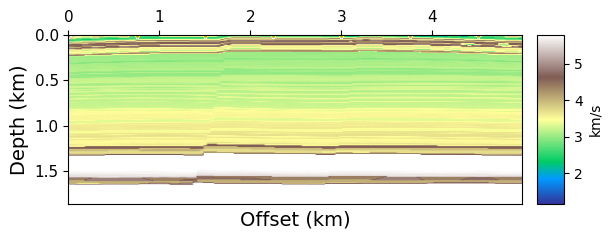

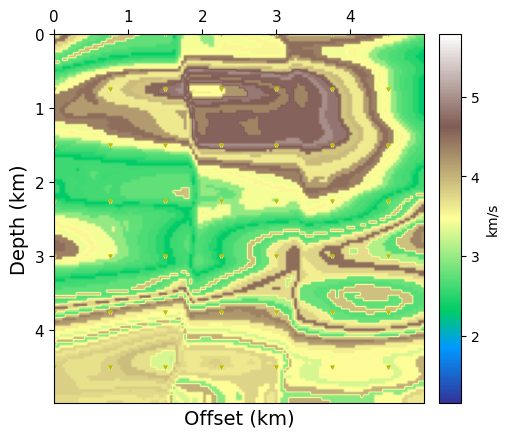

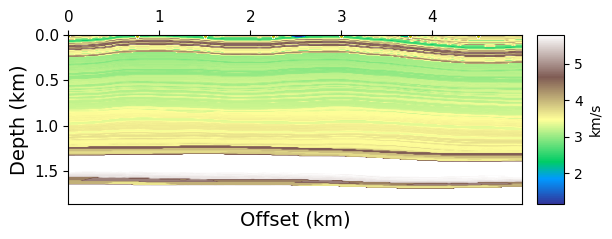

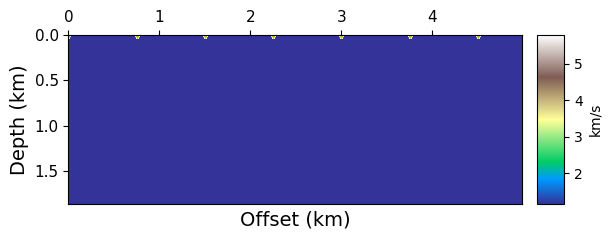

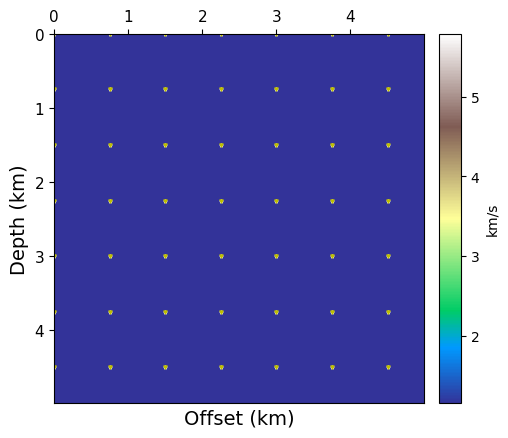

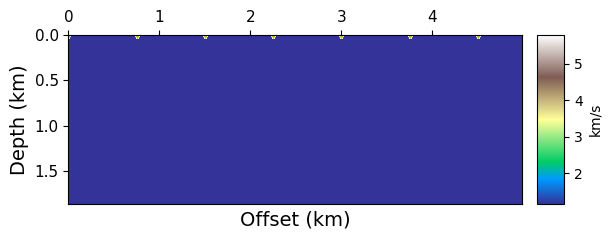

In [3]:
# Setup
if args.use_wandb=='y':
    wandb.config.update(args)

seed = args.seed

set_seed(seed)
device = set_device()

# Medium setup

input_wsrc = [X, Y, Z, SX, SY, SZ, taud, taudx, taudy, T0, px0, py0, pz0, index]
input_wosrc = [i.ravel()[isource.reshape(-1)][perm_id] for i in input_wsrc]
if args.field_synthetic=='y':
    input_wonan = [i.ravel()[~np.isnan(NAN.ravel()[isource.reshape(-1)][perm_id])] for i in input_wosrc]

# Network
lay = 'linear'
ini = args.initialization
bias = 0.2
mean = 0.01
std = 0.05
opttype = 'adam'
lr = args.learning_rate

torch.manual_seed(seed)
if args.residual_network=='n':
    tau_model = FullyConnectedNetwork(4, 1, [args.num_neurons]*args.num_layers, last_act=args.tau_act, act=args.activation, lay=lay, last_multiplier=args.tau_multiplier)
else:
    tau_model = ResidualNetwork(4, 1, num_neurons=args.num_neurons, num_layers=args.num_layers, act=args.activation, lay=lay, last_multiplier=args.tau_multiplier)
tau_model.to(device)

torch.manual_seed(seed)
if args.residual_network=='n':
    v_model = FullyConnectedNetwork(3, 1, [args.num_neurons//2]*args.num_layers, act=args.activation, lay=lay, last_act='relu', last_multiplier=args.v_multiplier)
else:
    v_model = ResidualNetwork(3, 1, num_neurons=args.num_neurons//2, act='relu', last_act='relu', num_layers=args.num_layers, lay=lay, last_multiplier=args.v_multiplier)
v_model.to(device)
v_model.apply(lambda m: init_weights(m, init_type=ini, bias=bias, mean=mean, std=std))

perc = args.num_points

if args.irregular_grid=='y':
    npoints = int(X.size * perc)
    ipermute = np.random.permutation(np.arange(X.size))[:npoints]
else:
    ipermute = None

# Compute traveltime with randomly initialized network
pde_loader, ic = create_dataloader3d([i.ravel() for i in input_wsrc], sx, sy, sz,
                                   shuffle=False, batch_size=1024, fast_loader=True, perm_id=ipermute)

if args.exp_function=='y':
    rec_op = (1-np.exp((Z.reshape(X.shape)-z[args.zid_receiver])**args.exp_factor))
else:
    rec_op = Z.reshape(X.shape)

# if args.factorization_type=='multiplicative':
#     tau_true = np.divide(
#         T_data.reshape(X.shape), 
#         T0.reshape(X.shape), 
#         out=np.ones_like(T0.reshape(X.shape)), 
#         where=T0.reshape(X.shape)!=0
#     )
#     tau_true = tau_true - taud.reshape(X.shape)
#     tau_true = np.divide(
#         tau_true, 
#         rec_op, 
#         out=np.ones_like(Z.reshape(X.shape)), 
#         where=Z.reshape(X.shape)!=0
#     )
#     T_true = (rec_op*tau_true + taud.reshape(X.shape))*T0.reshape(X.shape)
# else:
#     tau_true = T_data.reshape(X.shape) - T0.reshape(X.shape) - taud.reshape(X.shape)
#     tau_true = np.divide(
#         tau_true, 
#         rec_op, 
#         out=np.ones_like(Z.reshape(X.shape)), 
#         where=Z.reshape(X.shape)!=0
#     )
#     T_true = rec_op*tau_true + taud.reshape(X.shape) + T0.reshape(X.shape)

v_init = evaluate_velocity3d(v_model, pde_loader, X.size, batch_size=1024, device=device)
tau_init = evaluate_tau3d(tau_model, pde_loader, X.size, batch_size=1024, device=device)

elapsed = time.time() - start_time
print('Loading time: %.2f minutes' %(elapsed/60.))

# Optimizer
if opttype == 'adam':
    optimizer = torch.optim.Adam(list(tau_model.parameters()) + list(v_model.parameters()), lr=lr, betas=(0.9, 0.999), eps=1e-5)
elif opttype == 'lbfgs':
    optimizer = torch.optim.LBFGS(list(tau_model.parameters()) + list(v_model.parameters()), line_search_fn="strong_wolfe")

# Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=args.reduce_after, verbose=True)

v_init = v_init.detach().cpu().numpy().reshape(X.shape)

# ZX plane after
plot_section(v_init.reshape(X.shape)[:,10,:,0], 'v_init_zx.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou],rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Z[:,:,:,0].reshape(-1)[id_rec])

# XY plane
plot_section(v_init.reshape(X.shape)[5,:,:,0], 'v_init_xy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Y[:,:,:,0].reshape(-1)[id_sou],rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Y[:,:,:,0].reshape(-1)[id_rec])

# ZY plane
plot_section(v_init.reshape(X.shape)[:,:,10,0], 'v_init_zy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou],rx=Y[:,:,:,0].reshape(-1)[id_rec],rz=Z[:,:,:,0].reshape(-1)[id_rec])

# if data_type!='full':
#     if args.field_synthetic=='y':
#         for i in range(0, len(id_sou_x), plot_int):
#             plot_horizontal(T_data.reshape(X.shape)[id_top_z,id_top_x,i], Td_nn[id_top_z,id_top_x,i], 
#                             x*args.plotting_factor,'Interpolation Comparison','T (s)',
#                             'T_comp_'+str(i)+'.png','True','NN', 
#                             save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)
#             plot_horizontal(smooth(np.gradient(T_data.reshape(X.shape)[id_top_z,id_top_x,i]),2,'blackman'), 
#                             np.gradient(Td_nn[id_top_z,id_top_x,i]), 
#                             x*args.plotting_factor,'Interpolation Comparison','dT/dx (s/km)',
#                             'Tdx_comp_'+str(i)+'.png','True','NN', 
#                             save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)
#     else:
#         for i in range(0, len(id_sou_x), plot_int):
#             plot_horizontal(T_data.reshape(X.shape)[0,:,i], Td_nn[0,:,i], 
#                             x*args.plotting_factor,'Interpolation Comparison','T (s)',
#                             'T_comp_'+str(i)+'.png','True','NN', 
#                             save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)
#             plot_horizontal(smooth(np.gradient(T_data.reshape(X.shape)[0,:,i]),2,'blackman'), np.gradient(Td_nn[0,:,i]), 
#                             x*args.plotting_factor,'Interpolation Comparison','dT/dx (s/km)',
#                             'Tdx_comp_'+str(i)+'.png','True','NN', 
#                             save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)

In [1]:
vs

NameError: name 'vs' is not defined

### Visualize 3D model

In [ ]:
tmp_idsx = [np.where(x==X[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))]
tmp_idsy = [np.where(y==Y[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))]
tmp_idsz = [np.where(z==Z[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))]

print([np.unique(np.isnan(i)) for i in input_wosrc])

for i in range(len(id_sou)):
    input_item = taudy.reshape(X.shape)
    print("Shot number #"+str(i+1)+" "+str(np.unique(input_item[0,:,:,i]==input_item[-1,:,:,i])))
 
for i in range(len(id_sou)):
    temp = np.copy(T_data3d.reshape(X.shape))
    print(temp[tmp_idsz[i], tmp_idsy[i], tmp_idsx[i], i])

for i in range(0,len(id_sou),len(id_sou)//3):
    # ZX plane after
    print(i,x[np.where(x==X[:,:,:,0].reshape(-1)[id_sou[i]])[0][0]])
    plot_section(Td_hc.reshape(X.shape)[:,np.where(y==Y[:,:,:,i].reshape(-1)[id_sou[i]])[0][0],:,i], 'T_data3d_zx.png', save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

    # XY plane
    plot_section(Td_hc.reshape(X.shape)[args.zid_source,:,:,i], 'T_data3d_xy.png', save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
                 sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Y[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Y[:,:,:,i].reshape(-1)[id_rec])

    # ZY plane
    plot_section(Td_hc.reshape(X.shape)[:,:,np.where(x==X[:,:,:,i].reshape(-1)[id_sou[i]])[0][0],i], 'T_data3d_zy.png', save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=Y[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=Y[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

## Training and Inference

In [ ]:
# Training
import time
start_time = time.time()
if args.field_synthetic=='y':
    loss_history = \
        training_loop3d(
            input_wonan, sx, sy, sz,
            tau_model, v_model, optimizer, args.num_epochs, 
            batch_size=Z.size//4000, device=device, scheduler=scheduler,
            fast_loader=True, args=dict_args
    ) 
else:
    loss_history = \
        training_loop3d(
            input_wosrc, sx, sy, sz,
            tau_model, v_model, optimizer, args.num_epochs, 
            batch_size=Z.size//4000, device=device, scheduler=scheduler, 
            fast_loader=True, args=dict_args
    )
elapsed = time.time() - start_time
print('Training time: %.2f minutes' %(elapsed/60.))

# Convergence history plot for verification
fig = plt.figure()
ax = plt.axes()
ax.semilogy(loss_history)
ax.set_xlabel('Epochs',fontsize=14)
plt.xticks(fontsize=11)
ax.set_ylabel('Loss',fontsize=14)
plt.yticks(fontsize=11);
plt.grid()
plt.savefig(os.path.join(wandb_dir, "loss.png"), format='png', bbox_inches="tight")

# Prediction
pde_loader, ic = create_dataloader3d([i.ravel() for i in input_wsrc], sx, sy, sz,
                                   shuffle=False, batch_size=1024, fast_loader=True, perm_id=ipermute)
v_pred = evaluate_velocity3d(v_model, pde_loader)

tau_pred = evaluate_tau3d(tau_model, pde_loader)

v_pred = v_pred.detach().cpu().numpy()
tau_pred = tau_pred.detach().cpu().numpy()

# if args.factorization_type=='multiplicative':
#     t_pred = (taud.reshape(X.shape) + rec_op*tau_pred)*T0.reshape(X.shape)
# else:
#     t_pred = taud.reshape(X.shape) + rec_op*tau_pred.reshape(X.shape) + T0.reshape(X.shape)

# v_pred = v_pred.detach().cpu().numpy().reshape(X.shape)[:,:,0]
# v_true = velmodel.reshape(Z.shape)[::1,:,0]

# if args.rescale_plot=='y':
#     earth_radi = args.plotting_factor # Average in km
#     xmin, xmax, deltax = earth_radi*xmin, earth_radi*xmax, earth_radi*deltax

#     if args.depth_shift=='y':
#         zmin, zmax, deltaz = earth_radi*(zmin-5), earth_radi*(zmax-5), earth_radi*deltaz
#     else:
#         zmin, zmax, deltaz = earth_radi*(zmin-0), earth_radi*(zmax-0), earth_radi*deltaz

#     # Creating grid, extending the velocity model, and prepare list of grid points for training (X_star)
#     z = np.arange(zmin,zmax+deltaz,deltaz)
#     x = np.arange(xmin,xmax+deltax,deltax)

#     # Point-source locations
#     sz = z[id_sou_z]
#     sx = x[id_sou_x]

#     Z,X,SX = np.meshgrid(z,x,sx,indexing='ij')

#     SZ = np.ones(SX.shape)*sz # Creating an array of sources along z with same size as SX

#     t_pred, T_data, T0 = t_pred*args.plotting_factor, T_data*args.plotting_factor, T0*args.plotting_factor

# plot_section(v_pred, "v_pred.png", vmin=np.nanmin(velmodel)+0.1, vmax=np.nanmax(velmodel)-0.5, 
#              save_dir=wandb_dir, aspect='equal',
#              xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
#              sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 
# plot_section(velmodel.reshape(Z.shape)[:,:,0], 'v_true.png', 
#              vmin=np.nanmin(velmodel)+0.1, vmax=np.nanmax(velmodel)-0.5, 
#              save_dir=wandb_dir, aspect='equal',
#              xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
#              sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 

# for i in range(0, len(id_sou_x), plot_int):
#     plot_section(tau_true[:,:,i], "tau_true_"+str(i)+".png", 's/km', 
#                  vmin=tau_true.min(), vmax=tau_true.max(), 
#                  save_dir=wandb_dir, aspect='equal',
#                  xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
#                  sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 
#     plot_section(-tau_pred.reshape(Z.shape)[:,:,i], "tau_pred_"+str(i)+".png", 's/km', 
#                  vmin=tau_true.min(), vmax=tau_true.max(), 
#                  save_dir=wandb_dir, aspect='equal',
#                  xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
#                  sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 
#     plot_contour(t_pred.reshape(X.shape), T_true.reshape(X.shape),
#                  T0.reshape(X.shape), i, nx, nz, len(id_sou_x), sx, sz, x, z,
#                  'contour_'+str(i)+'.png', save_dir=wandb_dir)
#     plot_section(t_pred.reshape(X.shape)[:,:,i], 't_pred_'+str(i)+'.png', 's', 
#                  save_dir=wandb_dir, aspect='equal') 

# v_pred[0,:] = np.copy(v_pred[1,:])

# for i in range(0, len(x), len(x)//5):
#     plot_trace(v_init, v_true, v_pred, i, x, z, "v_trace_"+str(i)+".png", save_dir=wandb_dir)

# ZX plane after
plot_section(v_pred.reshape(X.shape)[:,0,:,i], 'v_pred_zx.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

# XY plane
plot_section(v_pred.reshape(X.shape)[args.zid_source,:,:,i], 'v_pred_xy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Y[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Y[:,:,:,i].reshape(-1)[id_rec])

# ZY plane
plot_section(v_pred.reshape(X.shape)[:,:,0,i], 'v_pred_zy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=Y[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

# Save model
torch.save({
        'tau_model_state_dict': tau_model.state_dict(),
        'v_model_state_dict': v_model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss_history
}, wandb_dir+'/saved_model')

# To load
checkpoint = torch.load(wandb_dir+'/saved_model')
tau_model.load_state_dict(checkpoint['tau_model_state_dict'])
v_model.load_state_dict(checkpoint['v_model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [4]:
# # Save model
# torch.save({
#         'tau_model_state_dict': tau_model.state_dict(),
#         'v_model_state_dict': v_model.state_dict(),
#         'optimizer_state_dict': optimizer.state_dict()
# }, wandb_dir+'/saved_model')

# To load
checkpoint = torch.load(wandb_dir+'/saved_model')
tau_model.load_state_dict(checkpoint['tau_model_state_dict'])
v_model.load_state_dict(checkpoint['v_model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

## Playground

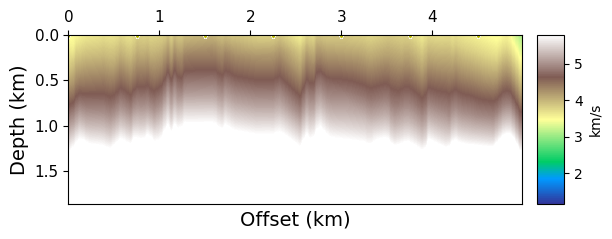

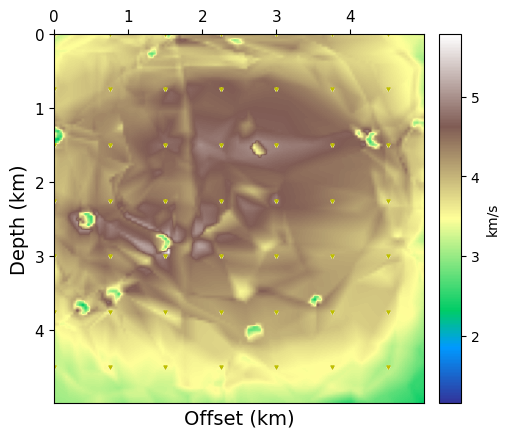

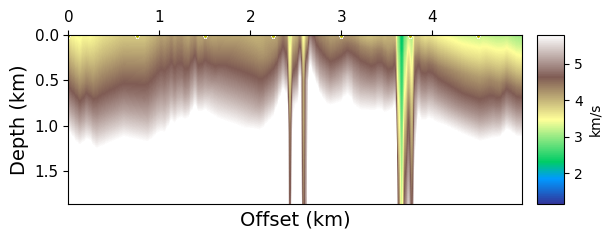

In [5]:
# To load
checkpoint = torch.load(wandb_dir+'/saved_model')
tau_model.load_state_dict(checkpoint['tau_model_state_dict'])
v_model.load_state_dict(checkpoint['v_model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Prediction
pde_loader, ic = create_dataloader3d([i.ravel() for i in input_wsrc], sx, sy, sz,
                                   shuffle=False, batch_size=512, fast_loader=True, perm_id=ipermute)
v_pred = evaluate_velocity3d(v_model, pde_loader, X.size, batch_size=512, device=device)

tau_pred = evaluate_tau3d(tau_model, pde_loader, X.size, batch_size=512, device=device)

v_pred = v_pred.detach().cpu().numpy()
tau_pred = tau_pred.detach().cpu().numpy()

# ZX plane after
plot_section(v_pred.reshape(X.shape)[:,10,:,i], 'v_pred_zx.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

# XY plane
plot_section(v_pred.reshape(X.shape)[5,:,:,i], 'v_pred_xy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Y[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Y[:,:,:,i].reshape(-1)[id_rec])

# ZY plane
plot_section(v_pred.reshape(X.shape)[:,:,10,i], 'v_pred_zy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=Y[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

In [ ]:
import matplotlib

def plot_slice(x, y, z, data, xslice, yslice, zslice, ax=None, vmin=None, vmax=None, fig_name=None, save_dir='./'):
    
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    else:
        fig = plt.figure()

    data_z = data[zslice,:,:]
    data_x = data[:,:,xslice]
    data_y = data[:,yslice,:]
    
    norm = matplotlib.colors.Normalize(vmin=data.min(), vmax=data.max())
    cmap = plt.cm.get_cmap('terrain')#plt.cm.
    m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    m.set_array([])
    # fcolors = m.to_rgba(data.reshape(-1,1))
    
    # Plot X slice
    xs, ys, zs = data.shape
    
    xplot = ax.plot_surface(np.atleast_2d(x[xslice]), y[:, np.newaxis], z[np.newaxis, :],
                            facecolors=m.to_rgba(data_x.T), cmap=cmap) #, vmin=1.5, vmax=8.85)
    # Plot Y slice
    yplot = ax.plot_surface(x[:, np.newaxis], np.atleast_2d(y[yslice]), z[np.newaxis, :],
                            facecolors=m.to_rgba(data_y.T), cmap=cmap) #, vmin=1.5, vmax=8.85)
    # Plot Z slice
    zplot = ax.plot_surface(x[:, np.newaxis], y[np.newaxis, :], np.atleast_2d(z[zslice]),
                            facecolors=m.to_rgba(data_z.T), cmap=cmap) #, vmin=1.5, vmax=8.85)
    # zplot.
    cbar = plt.colorbar(m, shrink=0.15, aspect=5, location='bottom')
    cbar.set_label('km/s')
    
    ax.invert_zaxis()
    ax.set_xlabel('X (km)')
    ax.set_ylabel('Y (km)')
    ax.set_zlabel('Z (km)')
    
    if fig_name is not None:
        plt.savefig(os.path.join(save_dir, fig_name), 
                    format='png', bbox_inches="tight")

# Computational model parameters
zmin = -0.1 if args.field_synthetic=='y' else 0; zmax = args.max_depth; deltaz = args.vertical_spacing;
ymin = 0.; ymax = args.max_offset; deltay = args.lateral_spacing;
xmin = 0.; xmax = args.max_offset; deltax = args.lateral_spacing;

if args.earth_scale=='y':
    earth_radi = 6371/args.scale_factor # Average in km
    xmin, xmax, deltax = earth_radi*xmin, earth_radi*xmax, earth_radi*deltax
    ymin, ymax, deltay = earth_radi*ymin, earth_radi*ymax, earth_radi*deltay
    zmin, zmax, deltaz = earth_radi*zmin, earth_radi*zmax, earth_radi*deltaz

# Creating grid, extending the velocity model, and prepare list of grid points for training (X_star)
z = np.arange(zmin,zmax+deltaz,deltaz)
nz = z.size

y = np.arange(ymin,ymax+deltay,deltay)
ny = y.size

x = np.arange(xmin,xmax+deltax,deltax)
nx = x.size

plot_slice(x, y, z, vel3d.reshape(X[:,:,:,0].shape), 0, y.size-1, z.size-1, fig_name='v_trueCube.png', save_dir=wandb_dir)
plot_slice(x, y, z, v_pred.reshape(X.shape)[:,:,:,0], 0, y.size-1, z.size-1, fig_name='v_predCube.png', save_dir=wandb_dir)
plot_slice(x, y, z, v_init.reshape(X.shape)[:,:,:,0], 0, y.size-1, z.size-1, fig_name='v_initCube.png', save_dir=wandb_dir)